In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
# Choose features, petal length and width.
X = iris.data[:, 2:]
y = iris.target

feature_labels = iris.feature_names[2:]
class_labels = iris.target_names

print('Shape of samples:', X.shape)
print('Feautre names:', feature_labels)
print('Class names:', class_labels)

Shape of samples: (150, 2)
Feautre names: ['petal length (cm)', 'petal width (cm)']
Class names: ['setosa' 'versicolor' 'virginica']


In [2]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

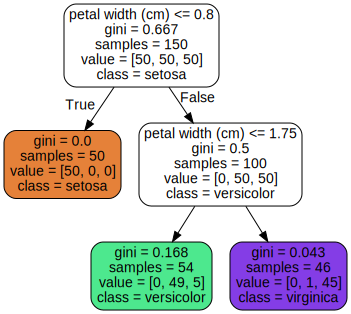

In [3]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(
    decision_tree=tree_clf,
    out_file='iris_classifier_tree.dot',
    feature_names=feature_labels,
    class_names=class_labels,
    rounded=True,
    filled=True
)

with open('iris_classifier_tree.dot') as f:
    iris_clf_graph = f.read()
dot = graphviz.Source(iris_clf_graph)
dot.format = 'png'
dot.render(filename='iris_classifier_tree', cleanup=True)
dot

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(classifier, axes, n_samples=100):
    x0 = np.linspace(axes[0], axes[1], n_samples)
    x1 = np.linspace(axes[2], axes[3], n_samples)
    z0, z1 = np.meshgrid(x0, x1)
    X_new = np.c_[z0.ravel(), z1.ravel()]
    y_pred = classifier.predict(X_new).reshape(z0.shape)
    plt.contourf(z0, z1, y_pred, cmap=plt.cm.rainbow, alpha=0.2)
    
def plot_iris_dataset(X, y):
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'bo', label='Iris-Setosa')
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'gs', label='Iris-Versicolor')
    plt.plot(X[:, 0][y == 2], X[:, 1][y == 2], 'r^', label='Iris-Virginica')
    plt.legend()

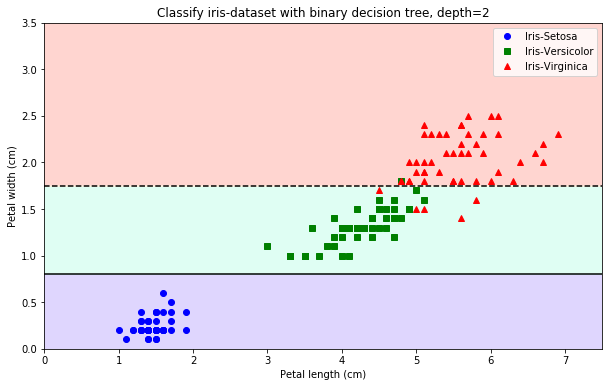

In [16]:
plt.figure('Iris-dataset', figsize=(10,6))
plt.title('Classify iris-dataset with binary decision tree, depth={}'.format(2))
plot_iris_dataset(X, y)
plot_decision_boundary(tree_clf, [0.0, 7.5, 0.0, 3.5])
plt.plot([0.0, 7.5], [0.8, 0.8], 'k')
plt.plot([0.0, 7.5], [1.75, 1.75], 'k--')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.show()

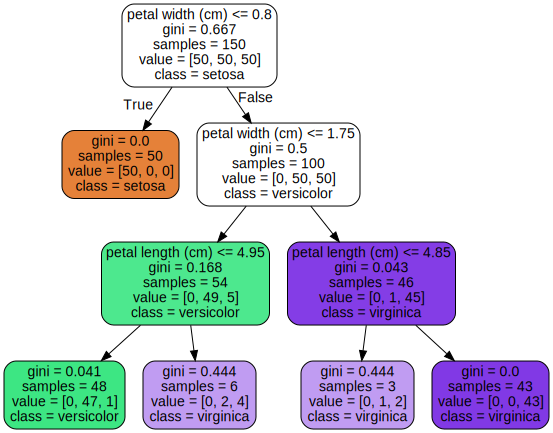

In [21]:
tree_clf_depth3 = DecisionTreeClassifier(max_depth=3)
tree_clf_depth3.fit(X, y)

export_graphviz(
    decision_tree=tree_clf_depth3,
    out_file='iris_classifier_tree_depth_3.dot',
    feature_names=feature_labels,
    class_names=class_labels,
    rounded=True,
    filled=True
)

with open('iris_classifier_tree_depth_3.dot') as f:
    iris_clf_graph = f.read()
dot = graphviz.Source(iris_clf_graph)
dot.format = 'png'
dot.render(filename='iris_classifier_tree_depth_3', cleanup=True)
dot

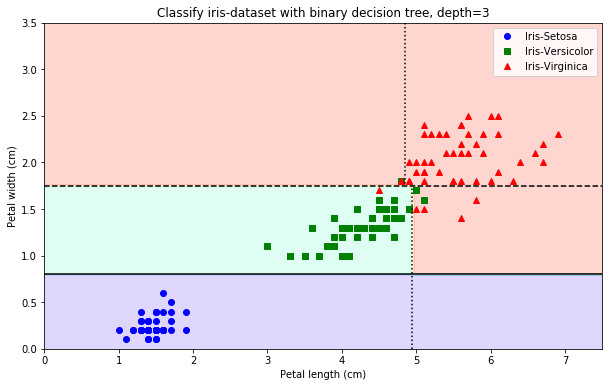

In [32]:
plt.figure('Iris-dataset', figsize=(10,6))
plt.title('Classify iris-dataset with binary decision tree, depth={}'.format(3))
plot_iris_dataset(X, y)
plot_decision_boundary(tree_clf_depth3, [0.0, 7.5, 0.0, 3.5])
plt.plot([0, 7.5], [0.8, 0.8], 'k')
plt.plot([0, 7.5], [1.75, 1.75], 'k--')
plt.plot([4.85, 4.85], [3.5, 1.75], 'k:')
plt.plot([4.95, 4.95], [0.0, 1.75], 'k:')
plt.plot([])
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.show()